In [3]:
# -*- coding: utf-8 -*-
# Import all libraries
import cv2
import glob as gb
import os
import numpy as np
from sklearn.externals import joblib
import time
import matplotlib.pyplot as plt
%matplotlib inline  

In [4]:
%%time
#Cut gait video into frames 

# vc = cv2.VideoCapture('inside//008a013s00L.dv')  # Read gait video file
vc = cv2.VideoCapture('008a013s00L.dv')
c = 1

if vc.isOpened():  # Check if the video can open successfully
    rval, frame = vc.read()
    #print("Read Successfully")

else:
    rval = False

count = 0
name_no = 0
while rval:  # cut frames from videos
    rval, frame = vc.read()
    count += 1
    if count >= 0 & count < 500:
        if (count % 3 == 0):  # store the frame each 3 frames
            name_no += 1
            cv2.imwrite('Frames/' + str(name_no) + '.png', frame)  # store frames
vc.release()



Wall time: 2.56 s


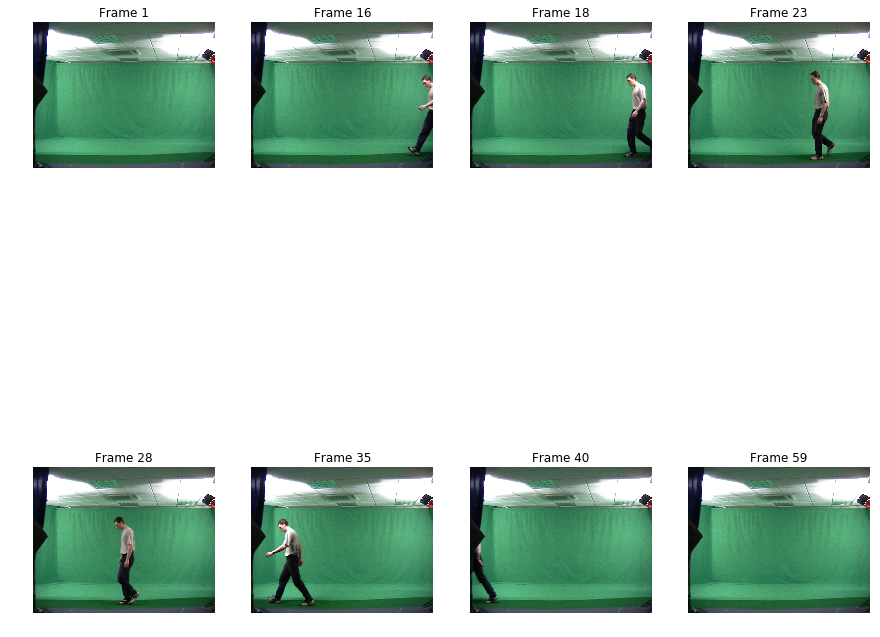

In [5]:
#Quick glance of all frames
frame1 = cv2.imread("Frames\\1.png")
frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
frame2 = cv2.imread("Frames\\16.png")
frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)
frame3 = cv2.imread("Frames\\18.png")
frame3 = cv2.cvtColor(frame3, cv2.COLOR_BGR2RGB)
frame4 = cv2.imread("Frames\\23.png")
frame4 = cv2.cvtColor(frame4, cv2.COLOR_BGR2RGB)
frame5 = cv2.imread("Frames\\28.png")
frame5 = cv2.cvtColor(frame5, cv2.COLOR_BGR2RGB)
frame6 = cv2.imread("Frames\\35.png")
frame6 = cv2.cvtColor(frame6, cv2.COLOR_BGR2RGB)
frame7 = cv2.imread("Frames\\40.png")
frame7 = cv2.cvtColor(frame7, cv2.COLOR_BGR2RGB)
frame8 = cv2 .imread("Frames\\59.png")
frame8 = cv2.cvtColor(frame8, cv2.COLOR_BGR2RGB)
fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(241) 
plt.title('Frame 1')
plt.axis('off')
ax1.imshow(frame1)
ax2=fig.add_subplot(242)
plt.title('Frame 16')
plt.axis('off')
ax2.imshow(frame2)
ax3=fig.add_subplot(243)
plt.title('Frame 18')
plt.axis('off')
ax3.imshow(frame3)
ax4=fig.add_subplot(244)
plt.title('Frame 23')
plt.axis('off')
ax4.imshow(frame4)
ax5=fig.add_subplot(245)
plt.title('Frame 28')
plt.axis('off')
ax5.imshow(frame5)
ax6=fig.add_subplot(246)
plt.title('Frame 35')
plt.axis('off')
ax6.imshow(frame6)
ax7=fig.add_subplot(247)
plt.title('Frame 40')
plt.axis('off')
ax7.imshow(frame7)
ax8=fig.add_subplot(248)
plt.title('Frame 59')
plt.axis('off')
ax8.imshow(frame8)
plt.show()

In [6]:
%%time
# Do temporal median on image sequences and Get Background of the Video

matrix = joblib.load("img_matrix.pkl")
img_sequence = np.array(matrix)
print(img_sequence.dtype)
print(img_sequence.shape)
background_blue_list = []
background_green_list = []
background_red_list = []
temporal_pixels_blue_list = []
temporal_pixels_green_list = []
temporal_pixels_red_list = []
for x in range(img_sequence.shape[1]):
    for y in range(img_sequence.shape[2]):
        for n in range(img_sequence.shape[0]):
            temporal_pixels_blue_list.append(img_sequence[n, x, y, 0])
            temporal_pixels_green_list.append(img_sequence[n, x, y, 1])
            temporal_pixels_red_list.append(img_sequence[n, x, y, 2])
        background_blue_list.append((np.median(temporal_pixels_blue_list)))
        background_green_list.append((np.median(temporal_pixels_green_list)))
        background_red_list.append((np.median(temporal_pixels_red_list)))
        temporal_pixels_blue_list = []
        temporal_pixels_green_list = []
        temporal_pixels_red_list = []
background_blue = np.uint8(np.array(background_blue_list).reshape(img_sequence.shape[1], img_sequence.shape[2]))
background_green = np.uint8(np.array(background_green_list).reshape(img_sequence.shape[1], img_sequence.shape[2]))
background_red = np.uint8(np.array(background_red_list).reshape(img_sequence.shape[1], img_sequence.shape[2]))
background = cv2.merge([background_blue, background_green, background_red])

uint8
(59, 576, 720, 3)
Wall time: 1min 7s


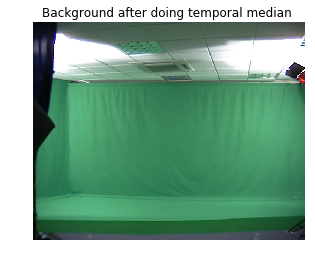

In [7]:
background_RGB=cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
fig=plt.figure()
plt.imshow(background_RGB)
plt.title('Background after doing temporal median ')
plt.axis('off')
plt.show()

In [8]:
# For counting how many picture in the file
def visitDir(path):
    if not os.path.isdir(path):
        print('Error: "', path, '" is not a directory or does not exist.')
        return
    else:
        global num
        try:
            for lists in os.listdir(path):
                sub_path = os.path.join(path, lists)
                num += 1
                # print('No.', x, ' ', sub_path)
                if os.path.isdir(sub_path):
                    visitDir(sub_path)
        except:
            pass

In [9]:
# Create path for read in frames
num = 0
path_list = []
visitDir("C:\\Users\\叶雨豪\\Dropbox\\Dissertation\\Pre-processing\\Frames")
for i in range(num + 1):
    path_no = "Frames\\" + str(i) + ".png"
    if i > 0:
        path_list.append(path_no)
print("This video contains: ", len(path_list), " Frames")

This video contains:  59  Frames


In [10]:
# Background subtraction demo
img1 = cv2.imread("Frames//24.png")
img2 = cv2.imread("1.png")
si1 = cv2.subtract(img2, img1)
si2 = cv2.subtract(img1, img2)
si1 = cv2.cvtColor(si1, cv2.COLOR_BGR2GRAY)  # Gray scale
si2 = cv2.cvtColor(si2, cv2.COLOR_BGR2GRAY)  # Gray scale
ret1, sil1 = cv2.threshold(si1, 25.5, 255, cv2.THRESH_BINARY)
ret2, sil2 = cv2.threshold(si2, 25.5, 255, cv2.THRESH_BINARY)
sii = cv2.bitwise_or(sil1, sil2)

In [12]:
%%time
# Background subtraction + Thresholding = Binary Silhouette  
for i in range(num):
    path = path_list[i]
    frame = cv2.imread(path)
    subtraction_back_frame = cv2.subtract(background, frame)
    subtraction_frame_back = cv2.subtract(frame, background)
    subtraction_back_frame = cv2.cvtColor(subtraction_back_frame, cv2.COLOR_BGR2GRAY)  # Gray scale
    subtraction_frame_back = cv2.cvtColor(subtraction_frame_back, cv2.COLOR_BGR2GRAY)  # Gray scale
    ret1, silhouette1 = cv2.threshold(subtraction_back_frame, 37, 255, cv2.THRESH_BINARY)
    ret2, silhouette2 = cv2.threshold(subtraction_frame_back, 37, 255, cv2.THRESH_BINARY)
    binary_silhouette = cv2.bitwise_or(silhouette1, silhouette2)
   
        
        
        
#     cv2.imwrite('Binary_Silhouette_37/' + str(i+1) + '.png', binary_silhouette)  # store frames
#     cv2.namedWindow('binary_silhouette', flags=0)
#     cv2.imshow('frame', sil1)
#     cv2.waitKey()
# cv2.destroyAllWindows()

Wall time: 1.27 s


In [25]:
%%time
# Background subtraction + Thresholding = Binary Silhouette  
for i in range(num):
    path = path_list[i]
    frame = cv2.imread(path)
    subtraction_back_frame = cv2.subtract(background, frame)
    subtraction_frame_back = cv2.subtract(frame, background)
    subtraction_back_frame = cv2.cvtColor(subtraction_back_frame, cv2.COLOR_BGR2GRAY)  # Gray scale
    subtraction_frame_back = cv2.cvtColor(subtraction_frame_back, cv2.COLOR_BGR2GRAY)  # Gray scale
    ret1, silhouette1 = cv2.threshold(subtraction_back_frame, 26, 255, cv2.THRESH_BINARY)
    ret2, silhouette2 = cv2.threshold(subtraction_frame_back, 26, 255, cv2.THRESH_BINARY)
    binary_silhouette = cv2.bitwise_or(silhouette1, silhouette2)   
#     cv2.imwrite('Binary_Silhouette_26/' + str(i+1) + '.png', binary_silhouette)  # store frames
#     cv2.namedWindow('binary_silhouette', flags=0)
#     cv2.imshow('frame', sil1)
#     cv2.waitKey()
# cv2.destroyAllWindows()

Wall time: 947 ms


In [20]:
%%time
print(1)

1
Wall time: 2.01 ms


In [ ]:
# for i in tqdm(range(1)): 

for i in tqdm(range(1,100)): 
    print(1)